# Ensaios de teste RTL-SDR
O objetivo de cada ensaio é plotar um gráfico de PSD (power spectral density) e a magnitude de potência em uma determinada frequência. Foram feitos vários ensaios para explorar configurações do equipamento de maneira a tentar mitigar o DC Spike que ocorre na frequência central da PSD. Foi feito também, em uma cor mais fraca, um tracejado para delimitar o lugar que o DC Spike apareceria para melhor verificar quando uma configuração surte efeito.

## Imports

In [1]:
from pylab import *
from rtlsdr import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.mlab import psd
import control

## Parâmetros de ensaio

In [2]:
sample_rate = 1e6
center_freq = 92.1e6

## Funções estruturantes

In [3]:
def fazer_aquisicao(sample_rate, center_freq, freq_correction, gain):
    if sample_rate < 1e6:
        print("sample_rate precisa estar entre 1e6 e 2e6")
        return
    if gain < 1:
        print("gain precisa ser maior igual a 1")
    if freq_correction < 1:
        print("freq_correction precisa ser maior igual a 1")
        return    
    sdr = RtlSdr()
    sdr.sample_rate = sample_rate
    sdr.center_freq = center_freq
    sdr.freq_correction = freq_correction
    sdr.gain = gain
    samples = sdr.read_samples(1024*1024)
    sdr.close()
    return samples

def fazer_grafico(samples, sample_rate, center_freq):
    if sample_rate < 1e6:
        print("sample_rate precisa ser maior igual a 1e6")
        return
    if center_freq < 1e6:
        print("center_freq precisa ser maior igual a 1e6")
        return    
    NFFT = 1024
    plt.figure()
    axes = plt.psd(samples, NFFT=NFFT, Fs=sample_rate/1e6, Fc=center_freq/1e6, zorder=10, color='crimson')
    x = np.ones(len(axes[0]))*center_freq/1e6
    dx = (((sample_rate)/1e6)/2)/25
    plt.plot(x+dx, 10*np.log10(axes[0]), color='pink', linestyle='dashed', zorder=5)
    plt.plot(x-dx, 10*np.log10(axes[0]), color='pink', linestyle='dashed', zorder=5)
    
    
    xlabel('Frequency (MHz)')
    ylabel('Relative power (dB)') 
    show()
    
def obter_magnitude(freq, samples, sample_rate, center_freq):
    if sample_rate < 1e6:
        print("sample_rate precisa ser maior igual a 1e6")
        return
    if center_freq < 1e6:
        print("center_freq precisa ser maior igual a 1e6")
        return
    sample_rate = sample_rate/1e6
    center_freq = center_freq/1e6
    freq = freq/1e6
    NFFT = 1024
    axes = psd(samples, NFFT=NFFT, Fs=sample_rate)
    y = 10*np.log10(axes[0])
    x = axes[1] + center_freq
    i = find_nearest(x, freq)    
    return x[i],y[i]

def find_nearest(array, value):
    #https://stackoverflow.com/questions/2566412/find-nearest-value-in-numpy-array
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def obter_magnitude_sem_ganho(mag, ganho):
    amp = control.db2mag(mag)/ganho
    return 20*np.log10(amp)

## Medição G=1; freq_correction=1

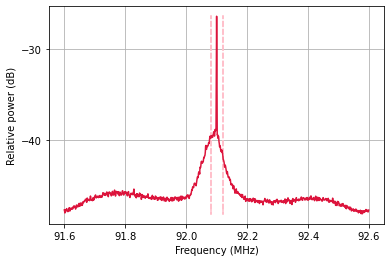

Na frequência 92.1 a magnitude é de -26.32429512731344 dB


In [4]:
samples = fazer_aquisicao(
    sample_rate = sample_rate,
    center_freq = center_freq,
    freq_correction = 1,
    gain = 1
)
fazer_grafico(
    samples = samples,
    sample_rate = sample_rate,
    center_freq = center_freq
)
freq, mag = obter_magnitude(
    freq = center_freq,
    samples = samples,
    sample_rate = sample_rate,
    center_freq = center_freq
)

print("Na frequência", freq, "a magnitude é de", mag, "dB")

## Medição G=1; freq_correction=1 c/ média subtraída

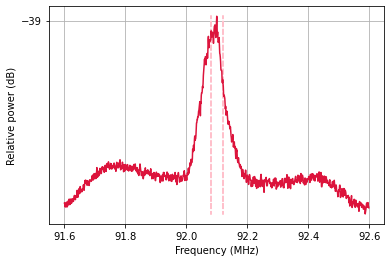

Na frequência 92.1 a magnitude é de -38.792246427258085 dB


In [5]:
samples = fazer_aquisicao(
    sample_rate = sample_rate,
    center_freq = center_freq,
    freq_correction = 1,
    gain = 1
)
samples = samples - np.mean(samples)
fazer_grafico(
    samples = samples,
    sample_rate = sample_rate,
    center_freq = center_freq
)
freq, mag = obter_magnitude(
    freq = center_freq,
    samples = samples,
    sample_rate = sample_rate,
    center_freq = center_freq
)

print("Na frequência", freq, "a magnitude é de", mag, "dB")

## Medição G=1; freq_correction=60

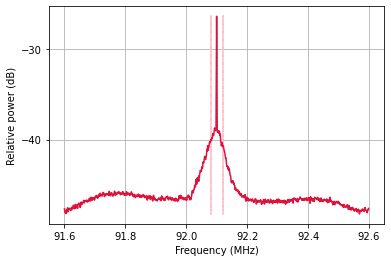

Na frequência 92.1 a magnitude é de -26.324226586684457 dB


In [6]:
samples = fazer_aquisicao(
    sample_rate = sample_rate,
    center_freq = center_freq,
    freq_correction = 60,
    gain = 1
)
fazer_grafico(
    samples = samples,
    sample_rate = sample_rate,
    center_freq = center_freq
)
freq, mag = obter_magnitude(
    freq = center_freq,
    samples = samples,
    sample_rate = sample_rate,
    center_freq = center_freq
)

print("Na frequência", freq, "a magnitude é de", mag, "dB")

## Medição G=1; freq_correction=60 c/ média subtraída

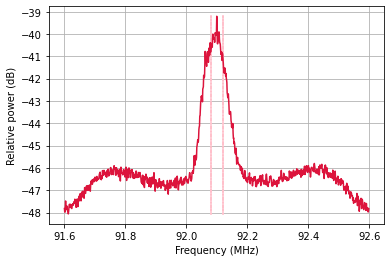

Na frequência 92.1 a magnitude é de -39.20210975592996 dB


In [7]:
samples = fazer_aquisicao(
    sample_rate = sample_rate,
    center_freq = center_freq,
    freq_correction = 60,
    gain = 1
)
samples = samples - np.mean(samples)
fazer_grafico(
    samples = samples,
    sample_rate = sample_rate,
    center_freq = center_freq
)

freq, mag = obter_magnitude(
    freq = center_freq,
    samples = samples,
    sample_rate = sample_rate,
    center_freq = center_freq
)

print("Na frequência", freq, "a magnitude é de", mag, "dB")

## Medição G=128; freq_correction=60

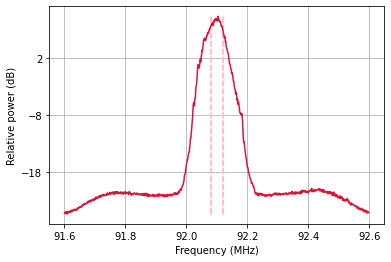

Na frequência 92.1 a magnitude é de 8.854287796876774 dB
Ou -33.28991159608059 dB se dividirmos o ganho da magnitude obtida


In [8]:
samples = fazer_aquisicao(
    sample_rate = sample_rate,
    center_freq = center_freq,
    freq_correction=60,
    gain = 128
)
fazer_grafico(
    samples = samples,
    sample_rate = sample_rate,
    center_freq = center_freq
)
freq, mag = obter_magnitude(
    freq = center_freq,
    samples = samples,
    sample_rate = sample_rate,
    center_freq = center_freq
)

print("Na frequência", freq, "a magnitude é de", mag, "dB")
print("Ou", obter_magnitude_sem_ganho(mag, 128), "dB se dividirmos o ganho da magnitude obtida")

## Medição G=128; freq_correction=60 c/ média subtraída

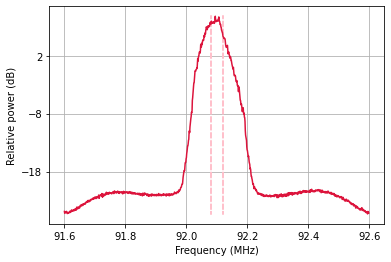

Na frequência 92.1 a magnitude é de 8.05426808746551 dB
Ou -34.08993130549186 dB se dividirmos o ganho da magnitude obtida


In [9]:
samples = fazer_aquisicao(
    sample_rate = sample_rate,
    center_freq = center_freq,
    freq_correction = 60,
    gain = 128
)
samples = samples - np.mean(samples)
fazer_grafico(
    samples = samples,
    sample_rate = sample_rate,
    center_freq = center_freq
)
freq, mag = obter_magnitude(
    freq = center_freq,
    samples = samples,
    sample_rate = sample_rate,
    center_freq = center_freq
)

print("Na frequência", freq, "a magnitude é de", mag, "dB")
print("Ou", obter_magnitude_sem_ganho(mag, 128), "dB se dividirmos o ganho da magnitude obtida")

## Conclusão
### Ganho 128
- Maior imunidade ao ruído estático
- A conta para a magnitude com ganho=1 retorna um valor bem próximo  
  
### Ganho 1
- Sucetível ao ruído estático e ruídos do ambiente
- É difícil saber se o DC Spike foi 100% eliminado por conta do ruído estático na medição